In [1]:
#konlpy 설치
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 51.4 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from wordcloud import WordCloud
from PIL import Image

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



from sklearn.metrics import confusion_matrix
from sklearn import metrics
import os

## 감성분석

여기에서의 모집단은 애견인이다.



In [5]:
os.chdir('/content/drive/MyDrive/알파코/01 과제&팀플/텍스트마이닝 팀플/알파코 텍마/data')

In [6]:
#데이터 불러오기
data=pd.read_pickle("tempdata.pickle")
data=data.reset_index(drop=True)
label_df=pd.read_csv("label.csv")

data=pd.concat([data,label_df],axis=1)
data=data.drop(["satisfy"], axis=1)

In [7]:
data.shape

(5044, 9)

In [8]:
#숫자를 문자로 저장해야 한다.
data['label']=data['label'].astype(str)
data['label']=data['label'].apply(lambda x: "positive" if x=="2" else ( "mix" if x=="1" else "negative"))
#data.info()

In [9]:
data['label'].value_counts()

positive    4140
mix          702
negative     202
Name: label, dtype: int64

## EDA

null 값은 없기때문에 결측치 제거는 생략한다.


label의 분포는 다음과 같다

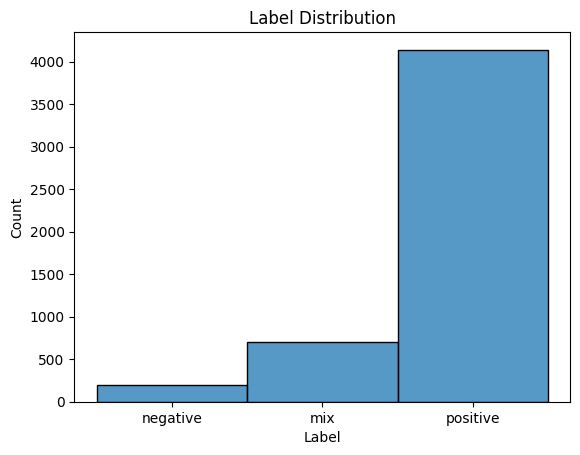

In [10]:
sns.histplot(x=data['label'])
plt.title("Label Distribution")
plt.xlabel("Label")
plt.savefig('label_distrubution.png')

긍정 리뷰에서 주요 단어와 부정 리뷰에서 주요 단어를 확인하면 다음과 같다.

In [11]:
wc_nt=data[data['label']=='negative']
wc_mix=data[data['label']=='mix']
wc_pt=data[data['label']=='positive']

okt=Okt()
#워드 클라우드를 위해 명사만 남기기
wc_nt=wc_nt['korean_only'].apply(lambda my_list: okt.nouns(my_list))
wc_nt=sum(wc_nt, [])

wc_mix=wc_mix['korean_only'].apply(lambda my_list: okt.nouns(my_list))
wc_mix=sum(wc_mix, [])

wc_pt=wc_pt['korean_only'].apply(lambda my_list: okt.nouns(my_list))
wc_pt=sum(wc_pt, [])


In [12]:
dic_nt={}
for i in wc_nt:
    if len(i)>1:
        if i in dic_nt:
            dic_nt[i]+=1
        else:
            dic_nt[i]=1

dic_mix={}
for i in wc_mix:
    if len(i)>1:
        if i in dic_mix:
            dic_mix[i]+=1
        else:
            dic_mix[i]=1

dic_pt={}
for i in wc_pt:
    if len(i)>1:
        if i in dic_pt:
            dic_pt[i]+=1
        else:
            dic_pt[i]=1

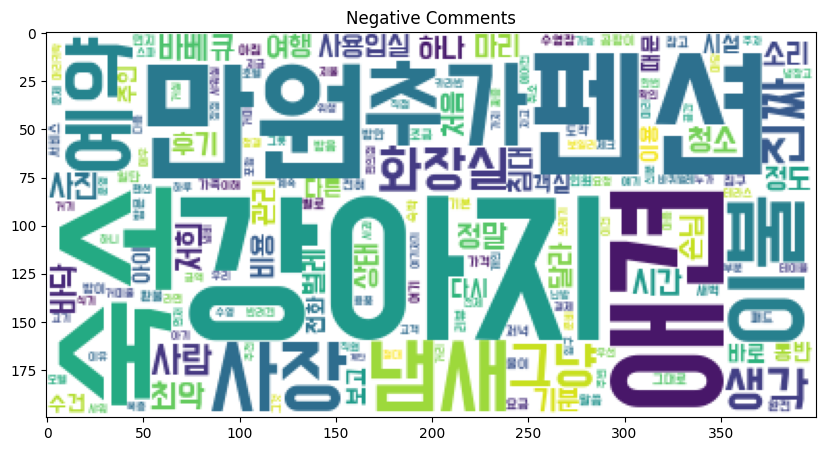

In [13]:
#워드 클라우드1- negative
wc=WordCloud(font_path="BMDOHYEON_ttf.ttf",
             background_color='white')
cloud=wc.generate_from_frequencies(dic_nt)

plt.figure(figsize=(10,5))
plt.title("Negative Comments")
plt.imshow(cloud)
#워드 클라우드 저장
#plt.savefig("wc_user_with_dog_negative.png")

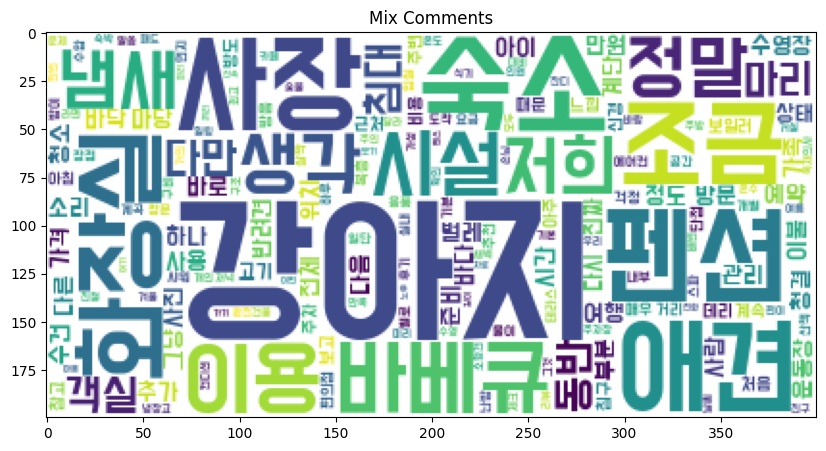

In [14]:
#워드 클라우드- amb
wc=WordCloud(font_path="BMDOHYEON_ttf.ttf",
             background_color='white')
cloud=wc.generate_from_frequencies(dic_mix)

plt.figure(figsize=(10,5))
plt.title("Mix Comments")
plt.imshow(cloud)
#워드 클라우드 저장
#plt.savefig("wc_user_with_dog_mixed.png")

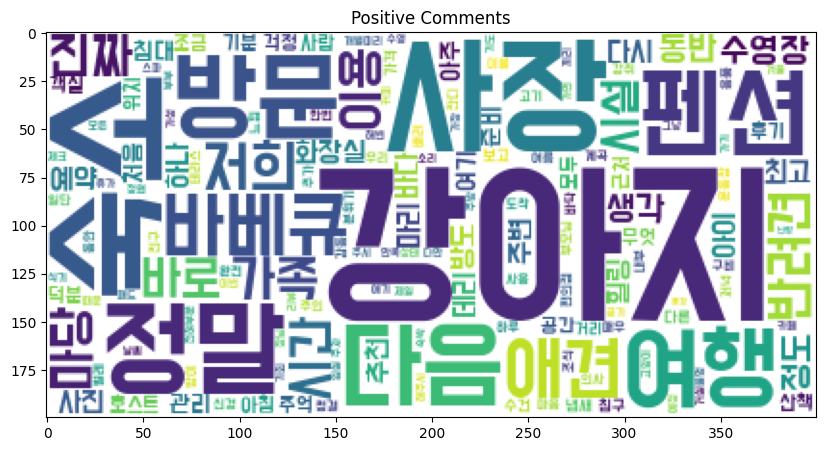

In [15]:
#워드 클라우드- positive
wc=WordCloud(font_path="BMDOHYEON_ttf.ttf",
             background_color='white')
cloud=wc.generate_from_frequencies(dic_pt)

plt.figure(figsize=(10,5))
plt.title("Positive Comments")
plt.imshow(cloud)
#워드 클라우드 저장
#plt.savefig("wc_user_with_dog_positive.png")

## Train, Test Split

In [16]:
x=data['words']
y=data['label']

In [17]:
X_train,X_test, y_train, y_test= train_test_split(x,y, random_state=0)
print(len(X_train), len(X_test), len(y_train), len(y_test))

3783 1261 3783 1261


In [18]:
X_train.head()

3703    [건물, 이나, 실내, 모두, 훌륭하다, 하지만, 관리, 좀, 아쉽다, 그리고, 반...
3753    [갯벌, 체험, 수, 있다, 장비, 대여, 가능하다, 바닷가, 까지, 걸다, 분, ...
1826    [어리다, 적, 부터, 자주, 가다, 사장, 님, 여전하다, 친절하다, 뵈다, 때,...
3319    [웰리, 힐리, 바로, 앞, 위치, 저렴하다, 가격, 너무, 잘, 즐기다, 오다, ...
2793    [일단, 개별, 테라스, 있다, 좋다, 멍멍, 이르다, 다, 들다, 대리, 고, 오...
Name: words, dtype: object

## 벡터화

TF-IDF 사용

In [19]:
def myTokenizer(x):
    return x

In [20]:
#TF-IDF

tfidf = TfidfVectorizer(lowercase = False, tokenizer = myTokenizer)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_train_tfidf.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3783, 9310)

In [23]:
tfidf.get_feature_names()[0:10]

AttributeError: ignored

In [22]:
#새로운 샐
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# CountVectorizer를 사용하여 데이터 벡터화
count_vectorizer = CountVectorizer(lowercase=False, tokenizer=myTokenizer)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# TfidfTransformer를 사용하여 TF-IDF 변환
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
X_test_tfidf = tfidf_transformer.transform(X_test_count)

print(X_train_tfidf.shape)


(3783, 9310)


In [24]:
print(tfidf_transformer.idf_[0:10])


[6.93595184 5.06414966 3.81800193 8.54538975 8.54538975 8.13992464
 6.53048673 4.5564057  6.10304271 3.82689088]


## 모델 학습 및 검증

Grid Search

In [25]:
#grid searchCV 함수를 통한 하이퍼 파라미터 튜닝

#병렬화
logistic =LogisticRegression() # 로지스틱 회귀 모델 객체 생성
penalty = ["l1", "l2"]
C= np.array([5, 5.5, 6, 6.5, 7])
hyperparameters = dict(C=C, penalty=penalty) # 하이퍼파라미터 옵션을 만듭니다.

gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, n_jobs=-1, verbose=1)
best_model = gridsearch.fit(X_train_tfidf, y_train)
best_model.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

{'C': 6.0, 'penalty': 'l2'}

#### Logistic Regression

하이퍼파라미터 튜닝을 통해 찾은 최적의 하이퍼 파라미터를 이용해 로지스틱 회귀분석을 하였다.




In [27]:
# Logistic Regression

logisticregression = LogisticRegression(C= 6.0, penalty='l2', max_iter=1000)
lg_fit=logisticregression.fit(X_train_tfidf, y_train)

In [28]:
#예측값 저장
y_pred=logisticregression.predict(X_test_tfidf)
y_pred_prob= logisticregression.predict_proba(X_test_tfidf)[::,1]

In [29]:
#lg_fit.summary()
lg_fit.coef_#(3, 9310)
#np.shape(X_train_tfidf)

array([[ 1.02770549e+00, -5.05806541e-01,  7.20888270e-01, ...,
         1.81785479e+00, -7.67582060e-03, -2.90898096e-02],
       [-1.65639583e-01, -2.11128333e-01,  2.36241455e-01, ...,
        -2.68550270e-01, -8.24577445e-04, -4.13061694e-03],
       [-8.62065909e-01,  7.16934874e-01, -9.57129724e-01, ...,
        -1.54930452e+00,  8.50039804e-03,  3.32204265e-02]])

In [30]:
lg_fit.intercept_

array([-0.56368402, -1.22221168,  1.7858957 ])

## 모델 평가


#### Confusion matrix

In [31]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 84,   4,  82],
       [ 19,  25,  15],
       [ 42,   2, 988]])

Confusion Matrix는 balanced data를 평가하는데 적합하다.

하지만 우리가 가진 데이터는 Imbalanced data이기 때문에 precision(정밀도) recall(재현율)을 사용하는 것보다는 정밀도와 재현율을 조화평균으로 나타낸 f1 score을 이용하여 평가하는 것이 좋다.


$f1 score= 2 * \frac{precision * recall} {precision + recall}$


In [41]:
# Precision 계산
p_a = cm[0][0] / (cm[0][0] + cm[1][0] + cm[2][0])
p_b = cm[1][1] / (cm[0][1] + cm[1][1] + cm[2][1])
p_c = cm[2][2] / (cm[0][2] + cm[1][2] + cm[2][2])
precision = (p_a + p_b + p_c) / 3

# Recall 계산
r_a = cm[0][0] / (cm[0][0] + cm[0][1] + cm[0][2])
r_b = cm[1][1] / (cm[1][0] + cm[1][1] + cm[1][2])
r_c = cm[2][2] / (cm[2][0] + cm[2][1] + cm[2][2])
recall = (r_a + r_b + r_c) / 3

# F1 Score 계산
f1 = 2 * (precision * recall) / (precision + recall)

data = {'Class': ['Negaive', 'Mix', 'Positive', 'Average'],
        'Precision': [p_a, p_b, p_c, precision],
        'Recall': [r_a, r_b, r_c, recall]
        }

result_df = pd.DataFrame(data)

# 결과 표 출력
print(result_df)

print("f1 score: ", f1)


      Class  Precision    Recall
0   Negaive   0.579310  0.494118
1       Mix   0.806452  0.423729
2  Positive   0.910599  0.957364
3   Average   0.765454  0.625070
f1 score:  0.6881756145183671


예측 라벨의 분포는 다음과 같다

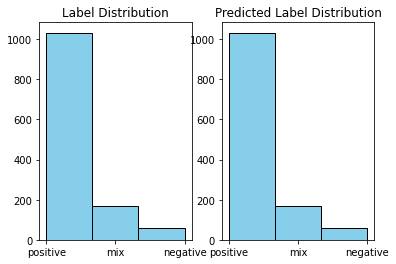

In [ ]:
temp_df=pd.DataFrame({'label':y_test, 'predicted label': y_test})

fig, axes=plt.subplots(1, 2)

axes[0].hist(temp_df["label"], bins=3, ec='black', color='skyblue')
axes[0].set_title("Label Distribution")

axes[1].hist(temp_df["predicted label"],bins=3,ec='black', color='skyblue')
axes[1].set_title("Predicted Label Distribution")
plt.savefig('predicted label distribution.png')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


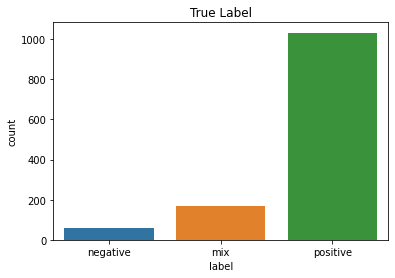

In [ ]:
sns.countplot(temp_df["label"],order = temp_df["label"].value_counts(ascending=True).index)
plt.title("True Label")
plt.savefig('True Label.png')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


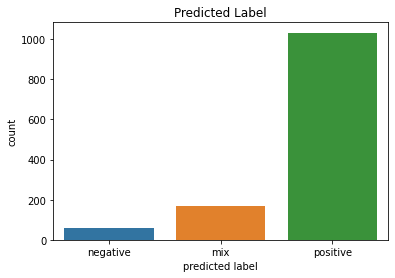

In [ ]:
sns.countplot(temp_df["predicted label"],order = temp_df["predicted label"].value_counts(ascending=True).index)
plt.title("Predicted Label")
plt.savefig('Predicted Label.png')